# Módulo de estatística 

## Projeto A - Análise do dataset "Wine Quality"

### Instruções

- O projeto deverá ser entregue até dia 22/11 antes do início da aula
- O projeto poderá ser feito em grupo com até 4 integrantes
- Serão 2 projetos A e B porém apenas 1 projeto deverá ser entregue e escolhido pelo grupo

- A entrega deve ser feita em jupyter notebook com os códigos explícitos e comentados. Além disso os conceitos, decisões e conclusões usadas devem estar destacadas no notebook

### Informações sobre o projeto

Dataset (conjunto de dados a ser utilizado) está disponível em:
    https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests): <br>
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data): <br>
- 12 - quality (score between 0 and 10)

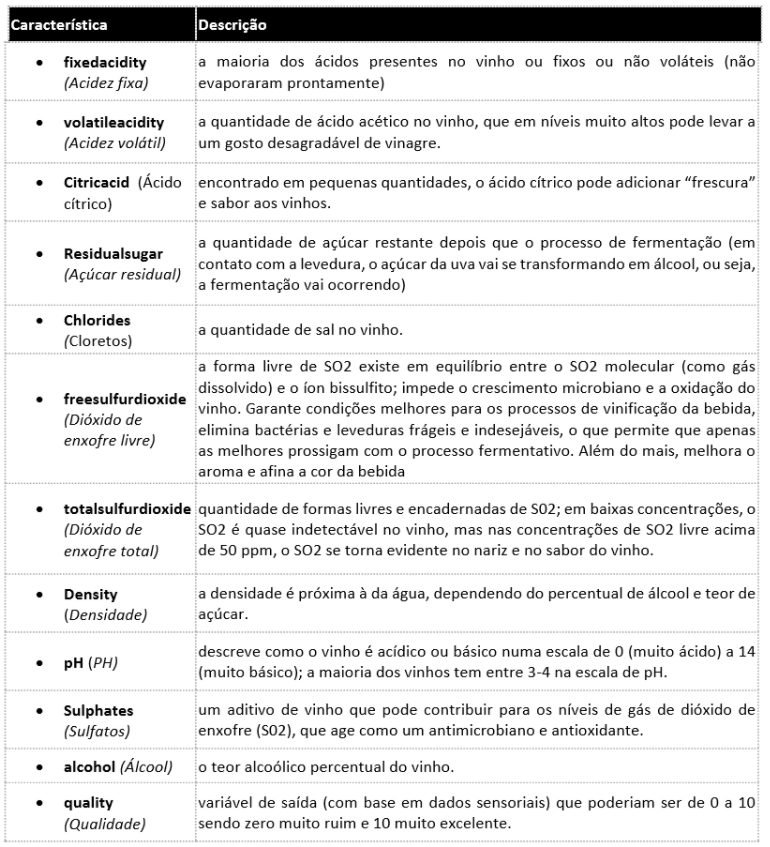

### Etapa 1

**EDA - Análise exploratória de dados**

- Análise das medidas de medidas de posição, dispersão, correlação (análises univaridas e bivariadas) - histograma, boxplot, mapa de calor, etc...
- Exclusão de outliers, caso necessário (sempre explicando a opção)



### Etapa 2

**Regressão Linear**

- Faça um algoritmo que estime a variável “Quality” em função das características físico-químicas dos vinhos
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

### Etapa 3

**Regressão logística**

- Sabendo que os vinhos com notas >= 6 são considerados vinhos de boa qualidade faça um algoritmo que classifique os vinhos em “Bom” ou “Ruim” em função de suas características físico-químicas;
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

https://github.com/johnnyhorita/empiricus-datascience-degree/blob/main/780/Modulo-04-Estatistica/Projeto/Projeto%20A%20-%20Wine%20Quality.ipynb

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path_vinho_branco = './data/winequality-white.csv'
path_vinho_tinto = './data/winequality-red.csv'
df_vinho_branco = pd.read_csv(path_vinho_branco, delimiter=';')
df_vinho_tinto = pd.read_csv(path_vinho_tinto, delimiter=';')

# Branco
## Parte 1

In [4]:
df_vinho_branco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
df_vinho_branco.duplicated().value_counts()

False    3961
True      937
dtype: int64

In [6]:
df_vinho_branco = df_vinho_branco.drop_duplicates().reset_index(drop=True)
df_vinho_branco.duplicated().value_counts()

False    3961
dtype: int64

In [7]:
df_vinho_branco.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        6.839346          0.280538     0.334332        5.914819   
std         0.866860          0.103437     0.122446        4.861646   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.045905            34.889169            137.193512     0.993790   
std       0.023103            17.210021             43.129065     0.002905   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.035000            23.000000            106.000000     0.991620   
50%       0.042000            33.000000            133.000000     0.993500   
75%       0.050000            45.000000            166.000000     0.995710   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  3961.000000  3961.000000  3961.000000  3961.000000  
mean      3.195458     0.490351    10.589358     5.854835  
std       0.151546     0.113523     1.217076     0.890683  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.480000    10.400000     6.000000  
75%       3.290000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

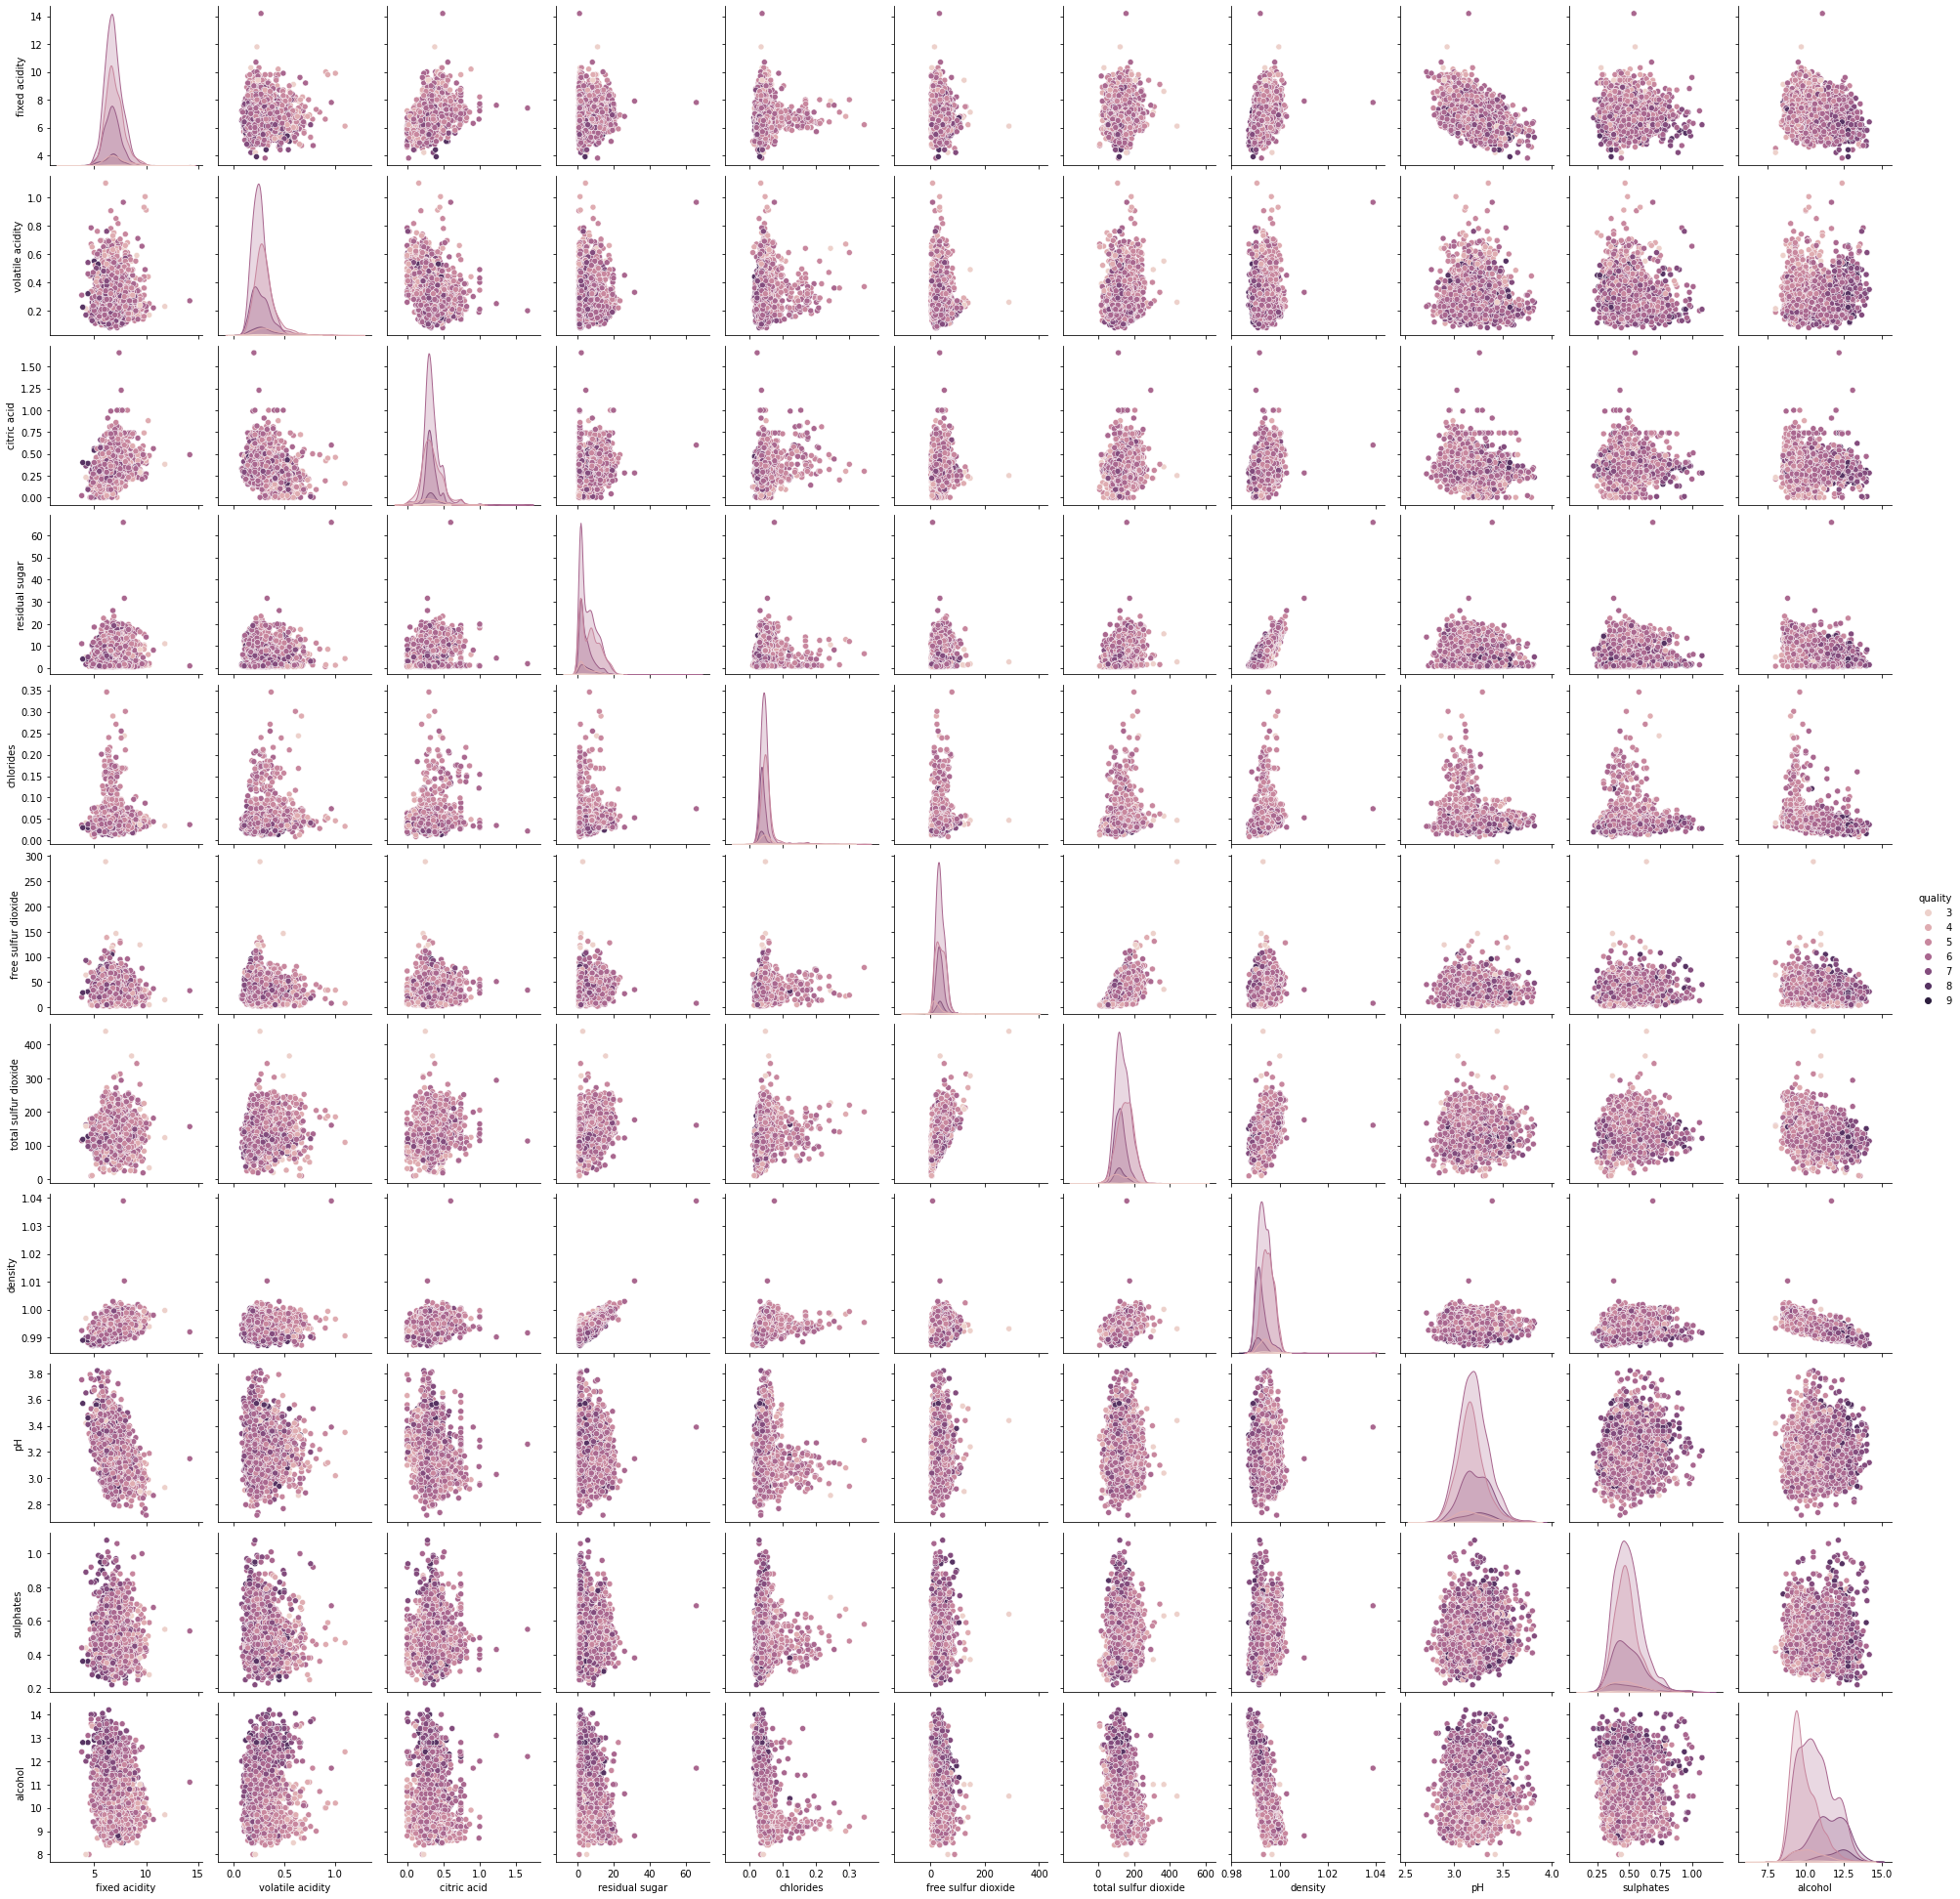

In [21]:
sns.pairplot(df_vinho_branco, hue='quality')
plt.show()

fixed acidity


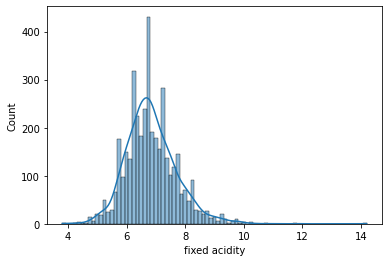

volatile acidity


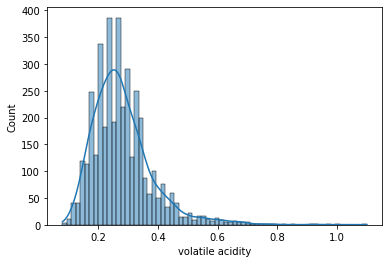

citric acid


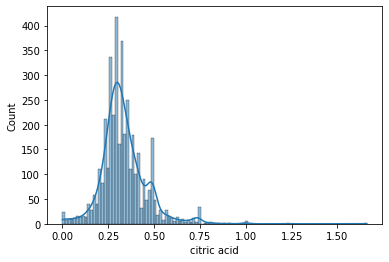

residual sugar


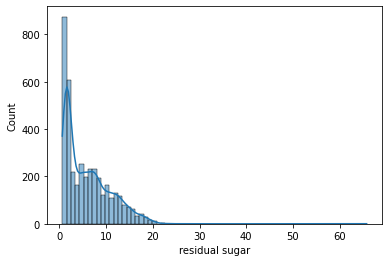

chlorides


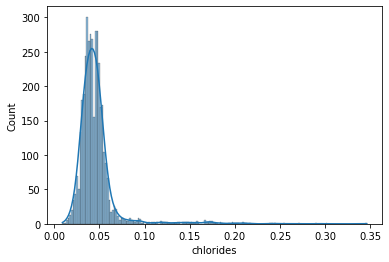

free sulfur dioxide


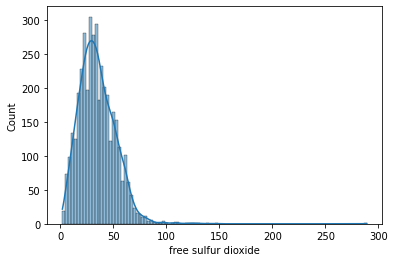

total sulfur dioxide


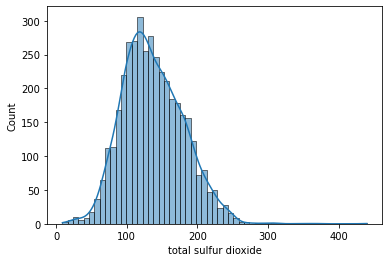

density


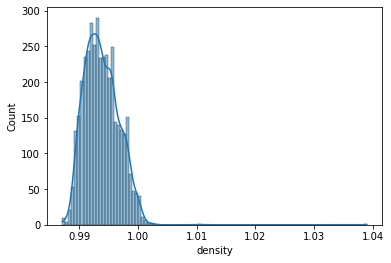

pH


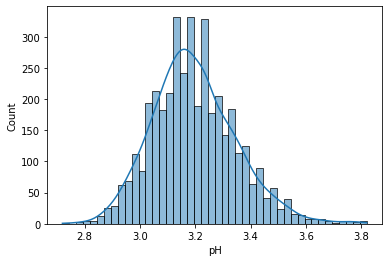

sulphates


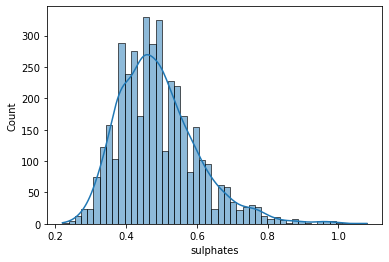

alcohol


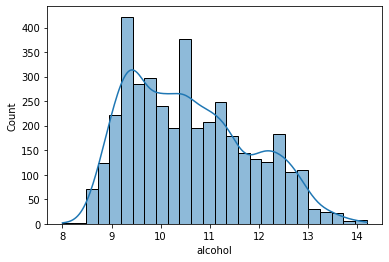

In [8]:
columns = df_vinho_branco.columns[:-1]

for c in columns:
    print(c)
    sns.histplot(x=c,data=df_vinho_branco,kde=True)
    plt.show()

fixed acidity


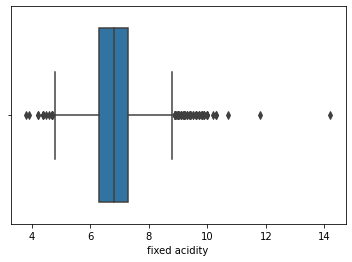

volatile acidity


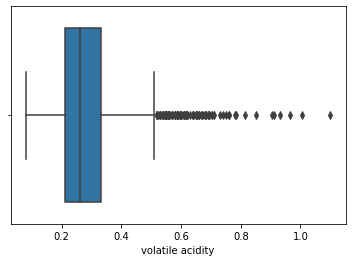

citric acid


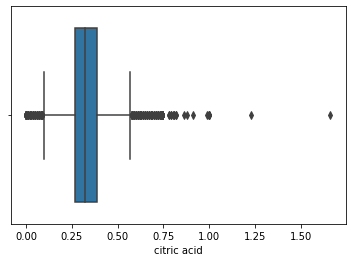

residual sugar


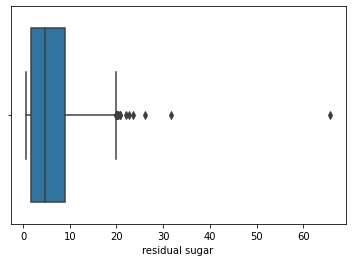

chlorides


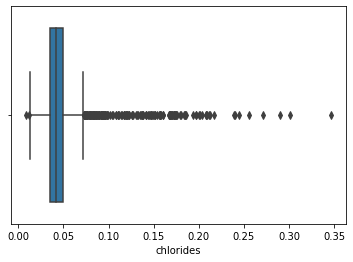

free sulfur dioxide


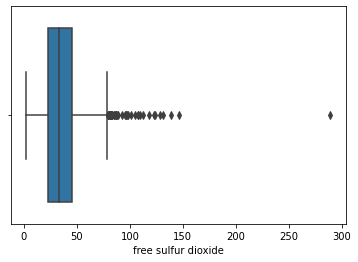

total sulfur dioxide


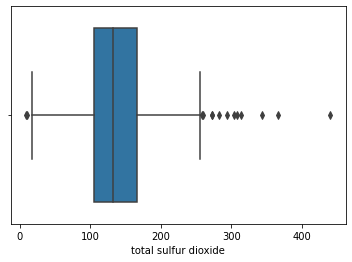

density


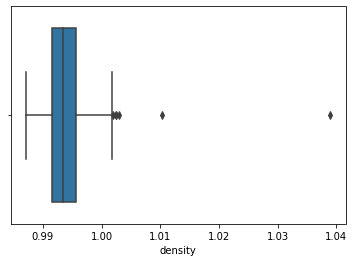

pH


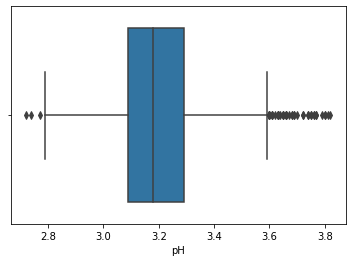

sulphates


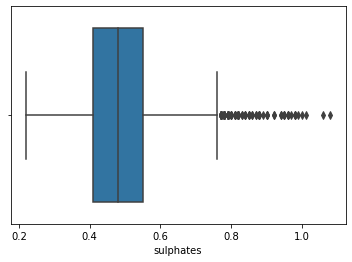

alcohol


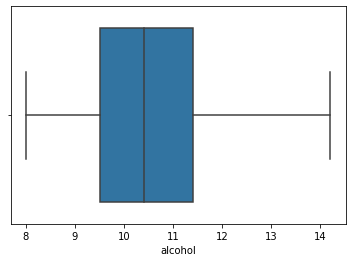

In [93]:
columns = df_vinho_branco.columns[:-1]

for c in columns:
    print(c)
    sns.boxplot(x=c ,data=df_vinho_branco)
    plt.show()

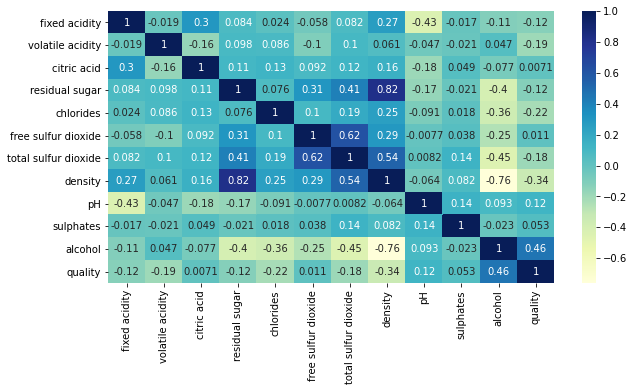

In [9]:
df_corr_vb = df_vinho_branco.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(df_corr_vb, cmap="YlGnBu", annot=True)
plt.show()

## Parte 2

fixed acidity


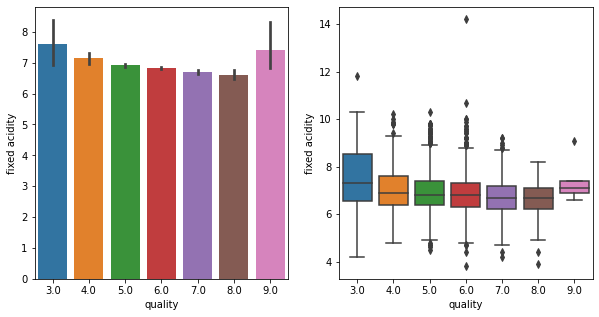

volatile acidity


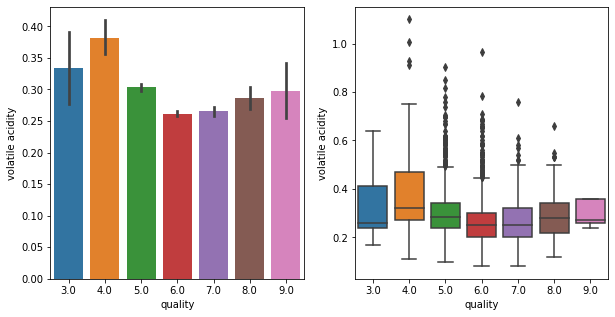

citric acid


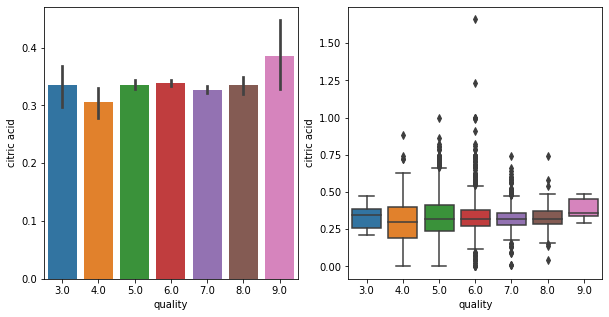

residual sugar


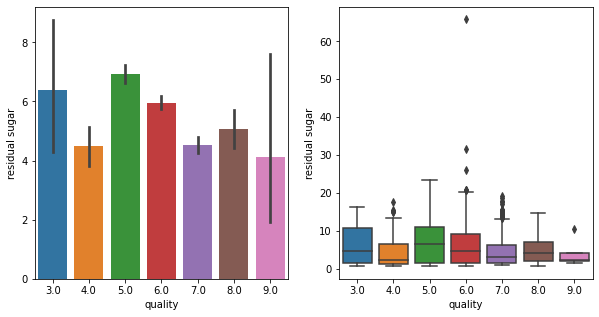

chlorides


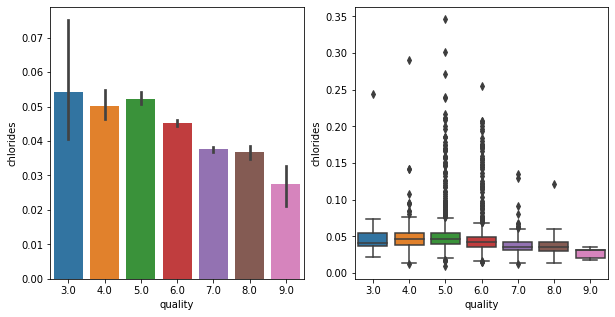

free sulfur dioxide


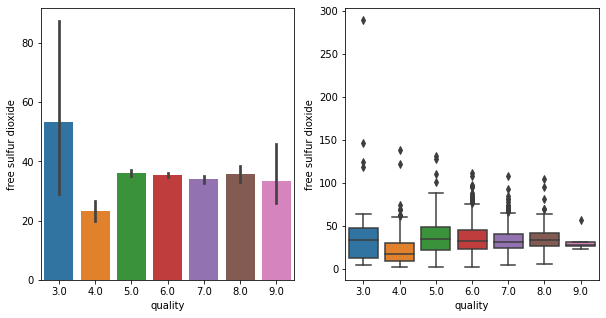

total sulfur dioxide


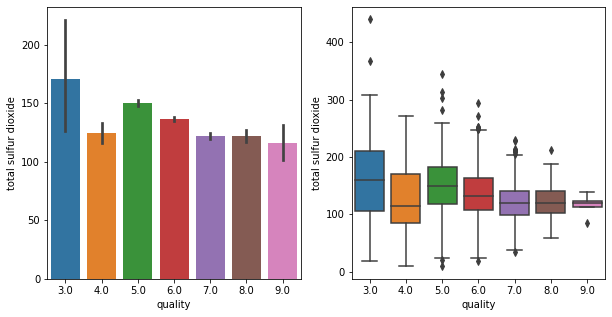

density


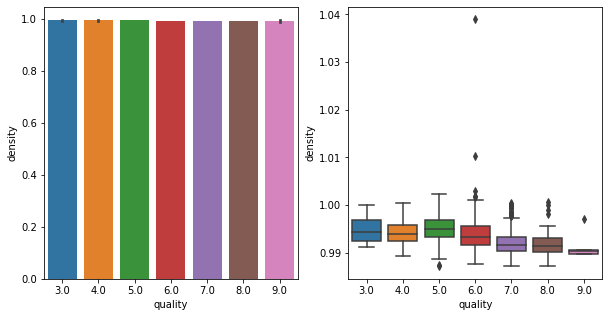

pH


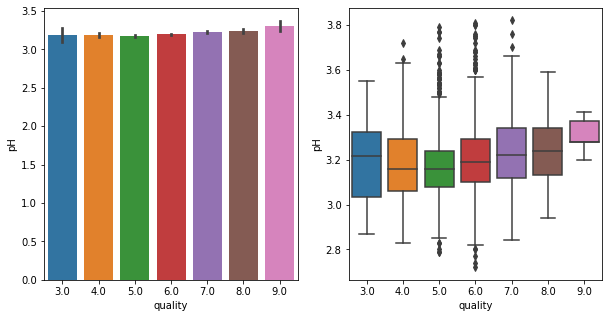

sulphates


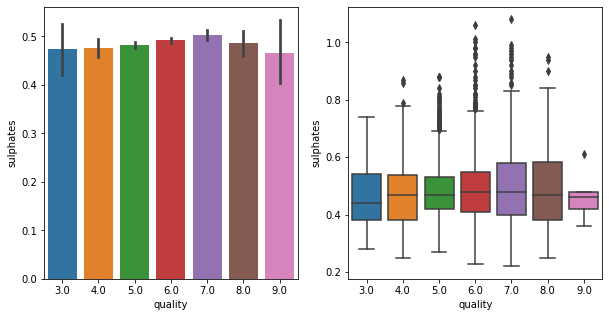

alcohol


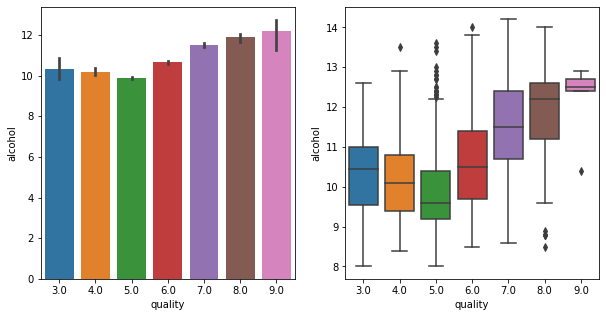

In [95]:
columns = df_vinho_branco.columns[:-1]
q = 'quality'
for c in columns:
    print(c)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.barplot(ax=ax[0], y=c, x=q, data=df_vinho_branco)
    sns.boxplot(ax=ax[1], y=c, x=q, data=df_vinho_branco)
    plt.show()

## 1ª regressão

In [10]:
df_vinho_branco['quality']

0       6
1       6
2       6
3       6
4       6
       ..
3956    6
3957    5
3958    6
3959    7
3960    6
Name: quality, Length: 3961, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# splitando os dados em treino e teste
X = df_vinho_branco.drop(["quality"], axis=1)
y = df_vinho_branco['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 7)

# normalizando os dados
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# fazendo a regressão
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [9]:
y_pred

array([5.84498115, 5.35400981, 5.95903233, 7.14811203, 5.15226007,
       4.81537063, 5.47115723, 5.69113944, 5.75917969, 5.58237258,
       6.69570209, 6.01444729, 5.50303717, 6.75765351, 5.0608101 ,
       5.47416827, 5.6195714 , 6.15438091, 6.3280015 , 5.41836642,
       5.63165044, 5.83869337, 5.51686083, 5.50300227, 6.5094514 ,
       5.71038113, 6.57625922, 6.06474815, 6.1657985 , 5.88582096,
       6.21885169, 5.01325609, 5.81088015, 5.30893235, 6.04809955,
       6.14373806, 5.80911269, 6.15280463, 6.37490784, 5.4156973 ,
       5.10307566, 6.2144006 , 5.90481969, 4.71285109, 5.58851249,
       4.26082959, 5.39240156, 5.57878789, 5.59844469, 6.01642147,
       6.69482233, 5.34670283, 6.11734526, 6.63279991, 5.64894413,
       4.81608993, 6.44085338, 6.42588219, 5.61268711, 5.6887776 ,
       5.5460208 , 4.7313466 , 5.33986763, 6.48396025, 6.82978274,
       5.20035502, 6.19716306, 5.91899408, 5.6597826 , 6.31292512,
       6.26482312, 6.06320523, 6.3620064 , 5.30868629, 5.24330

In [12]:
# Metricas
print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred, squared = False)) #rmse
print(metrics.mean_squared_error(y_test, y_pred)) #mse

0.3239107421672812
0.765147773933322
0.5854511159551181


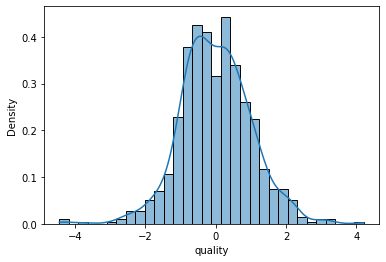

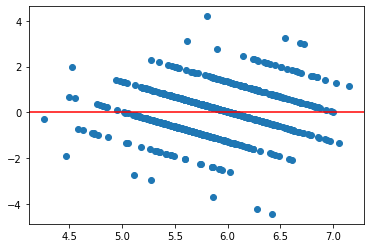

In [13]:
# análise de resido
residuals = y_test-y_pred
std_residuals = (residuals - residuals.mean())/residuals.std()

sns.histplot(std_residuals, kde = True, stat = "density")
plt.show()

# fig,ax = plt.subplots()
# probplot(std_residuals, plot = ax, fit=True)
# plt.show()

plt.scatter(y_pred, std_residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

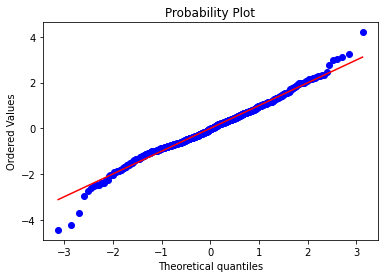

In [14]:
from scipy.stats import probplot

fig,ax = plt.subplots()
_,(_,_,_) = probplot(std_residuals, plot = ax, fit=True)

Pelas métricas e pela análise de resido, não foi uma boa regressão, voltemos as análises e escolheremos melhor as variaveis aplicaveis para nossa análise

## 2ª regressão

In [15]:
# splitando os dados em treino e teste
X = df_vinho_branco[["fixed acidity", 'chlorides', 'total sulfur dioxide', 'alcohol']]
y = df_vinho_branco['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 7)

# normalizando os dados
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# fazendo a regressão
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [16]:
# Metricas
print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred, squared = False)) #rmse
print(metrics.mean_squared_error(y_test, y_pred)) #mse

0.23400808503878712
0.8144330592416803
0.6633012079857624


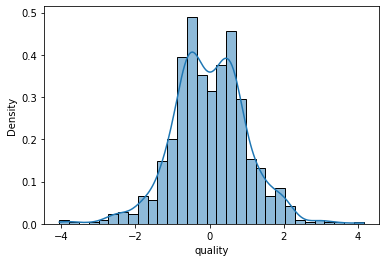

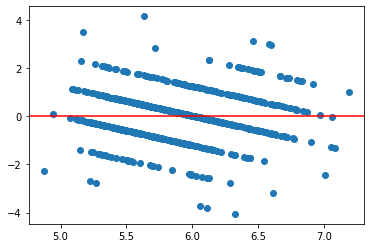

In [17]:
# análise de resido
residuals = y_test-y_pred
std_residuals = (residuals - residuals.mean())/residuals.std()

sns.histplot(std_residuals, kde = True, stat = "density")
plt.show()

# fig,ax = plt.subplots()
# probplot(std_residuals, plot = ax, fit=True)
# plt.show()

plt.scatter(y_pred, std_residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

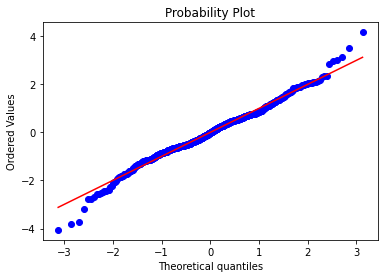

In [18]:
from scipy.stats import probplot

fig,ax = plt.subplots()
_,(_,_,_) = probplot(std_residuals, plot = ax, fit=True)

Regressão tambem não ficou muito boa, logo talvez não seja a melhor tecnica a ser aplicada. Partimos então para regressão logistica

# Parte 3

In [114]:
df_vinho_branco['veredito'] = df_vinho_branco.quality.apply(lambda x: 'Bom' if x >= 6 else 'Ruim')

In [115]:
df_vinho_branco.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36           20.70      0.045   
1            6.3              0.30         0.34            1.60      0.049   
2            8.1              0.28         0.40            6.90      0.050   
3            7.2              0.23         0.32            8.50      0.058   
4            6.2              0.32         0.16            7.00      0.045   
5            8.1              0.22         0.43            1.50      0.044   
6            8.1              0.27         0.41            1.45      0.033   
7            8.6              0.23         0.40            4.20      0.035   
8            7.9              0.18         0.37            1.20      0.040   
9            6.6              0.16         0.40            1.50      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 30.0                 136.0   0.9949  3.18       0.47   
5                 28.0                 129.0   0.9938  3.22       0.45   
6                 11.0                  63.0   0.9908  2.99       0.56   
7                 17.0                 109.0   0.9947  3.14       0.53   
8                 16.0                  75.0   0.9920  3.18       0.63   
9                 48.0                 143.0   0.9912  3.54       0.52   

   alcohol  quality veredito  
0      8.8      6.0      Bom  
1      9.5      6.0      Bom  
2     10.1      6.0      Bom  
3      9.9      6.0      Bom  
4      9.6      6.0      Bom  
5     11.0      6.0      Bom  
6     12.0      5.0     Ruim  
7      9.7      5.0     Ruim  
8     10.8      5.0     Ruim  
9     12.4      7.0      Bom

# Tinto
## Parte 1

In [11]:
df_vinho_tinto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
df_vinho_tinto.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [25]:
df_vinho_tinto.duplicated().value_counts()

False    1359
True      240
dtype: int64

In [26]:
df_vinho_tinto = df_vinho_tinto.drop_duplicates().reset_index(drop=True)
df_vinho_tinto.duplicated().value_counts()

False    1359
dtype: int64

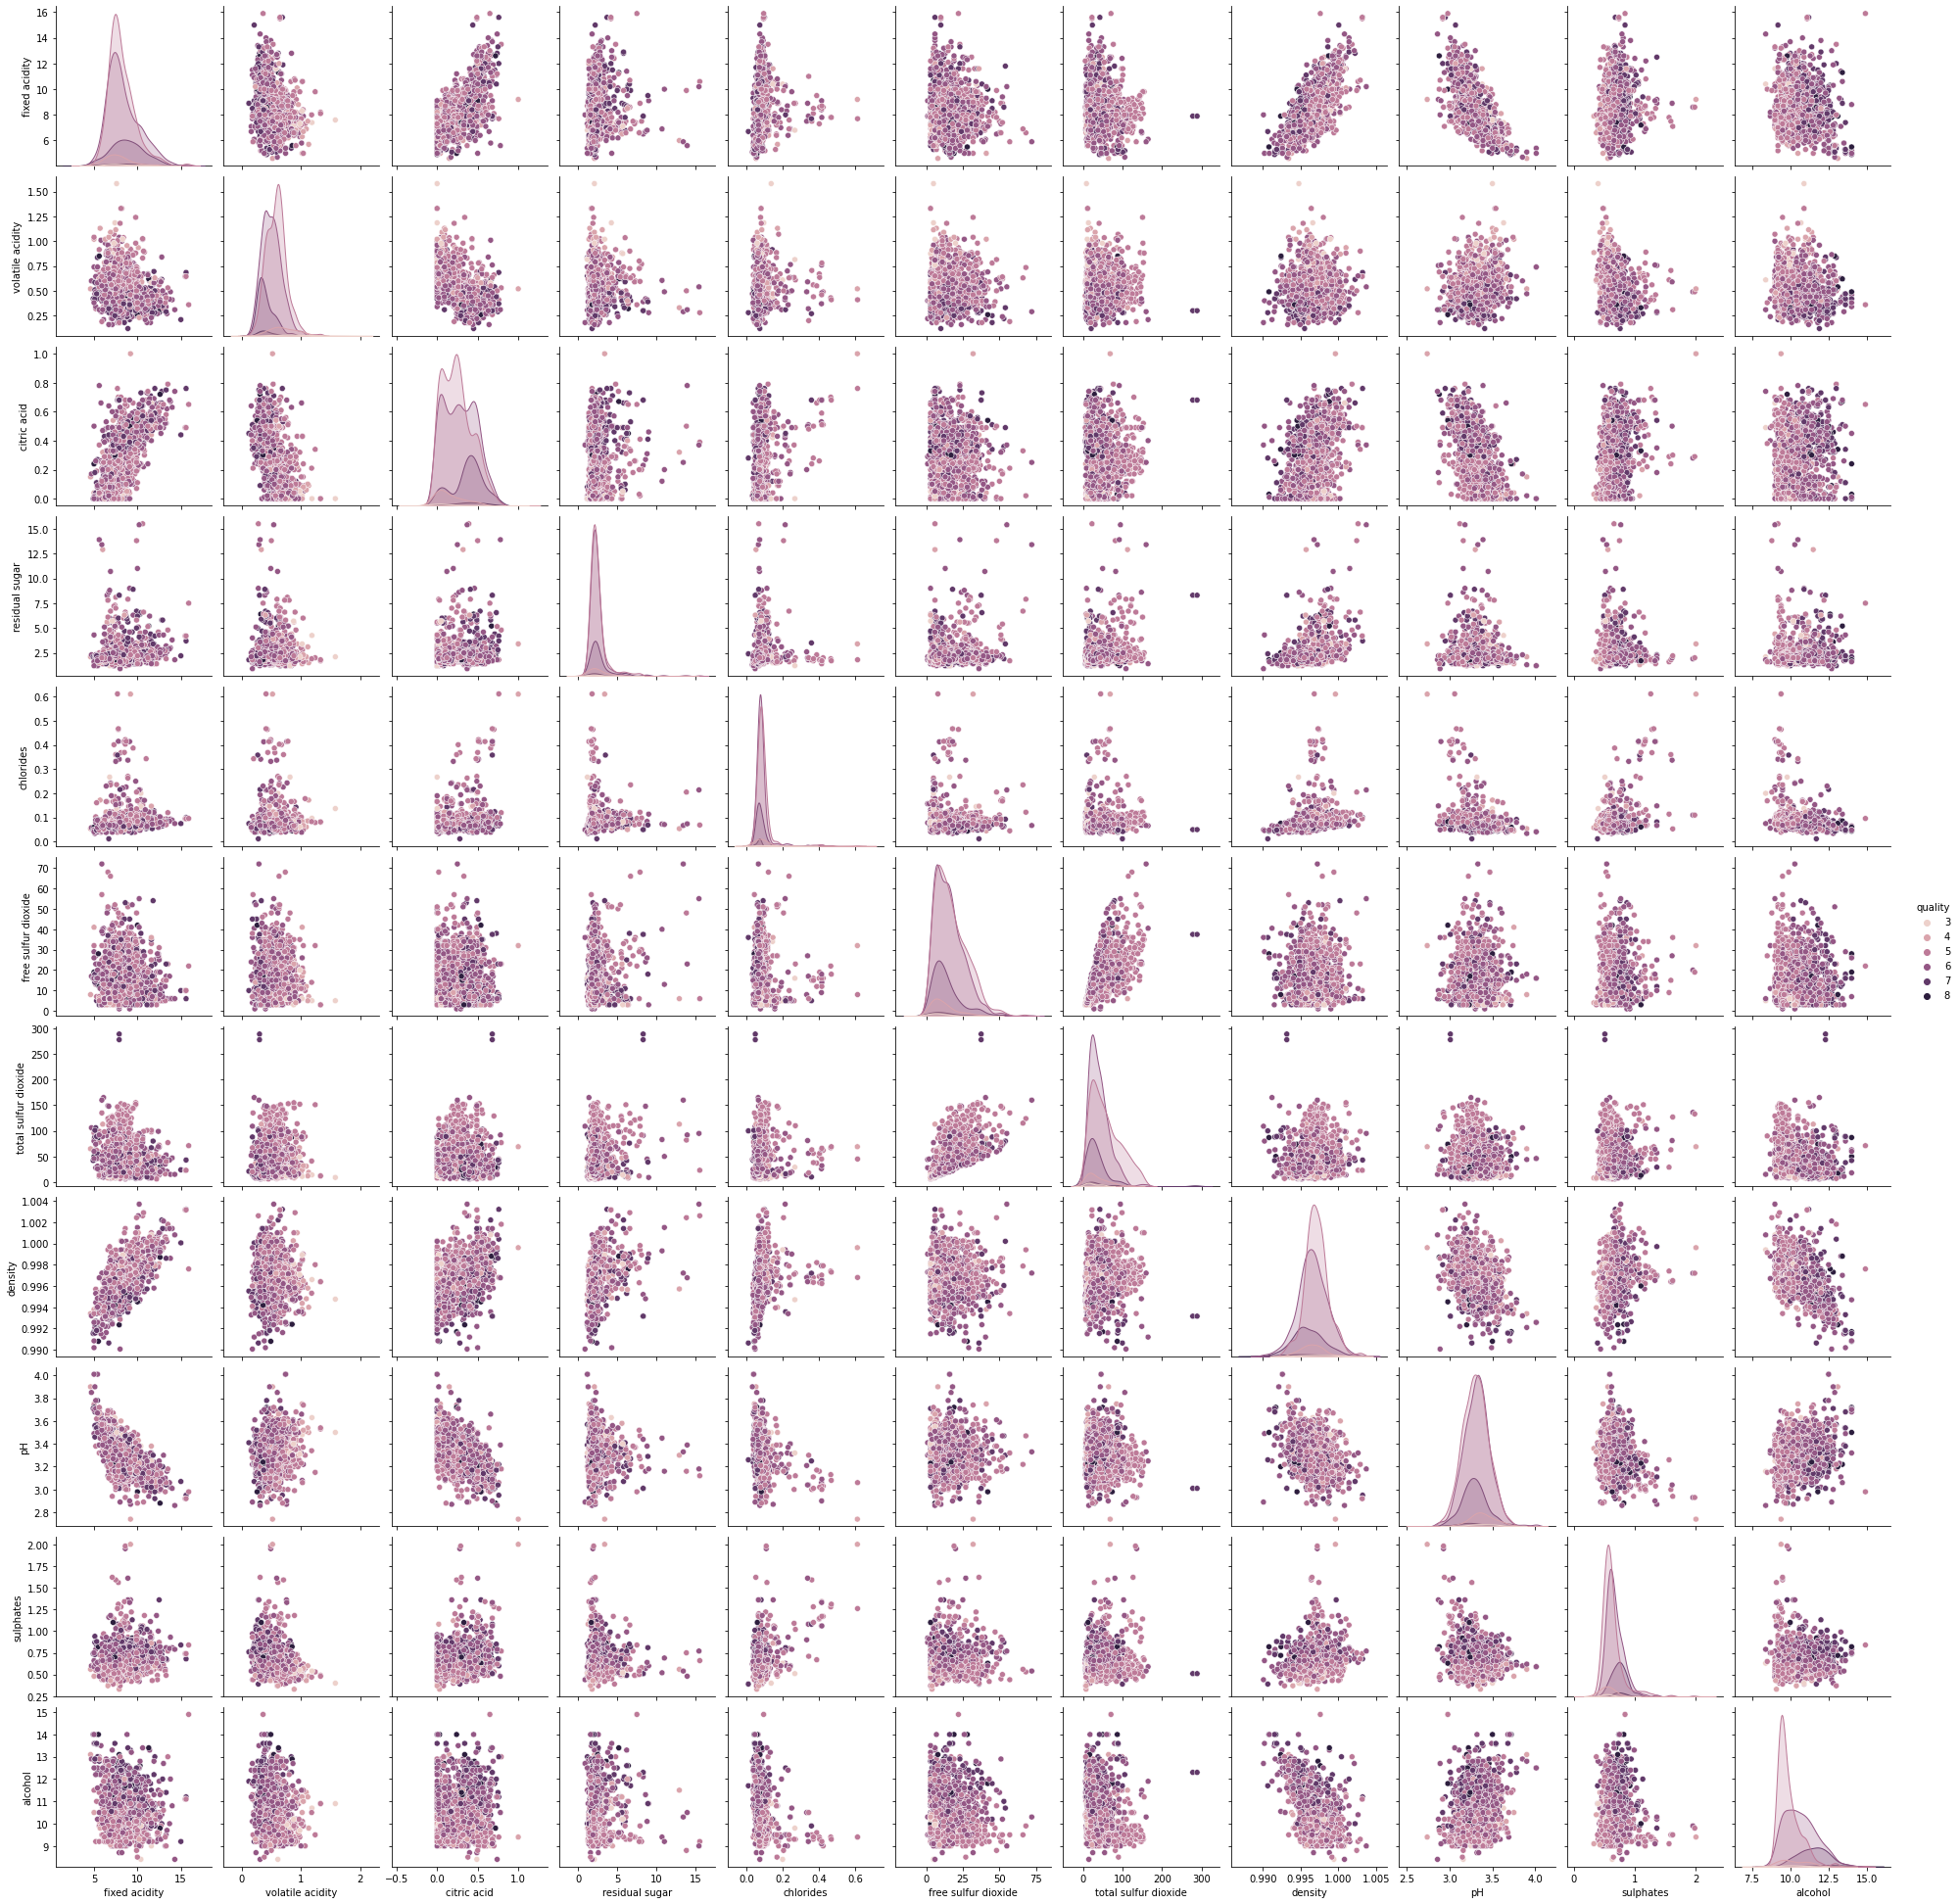

In [27]:
sns.pairplot(df_vinho_tinto,  hue='quality')
plt.show()

fixed acidity


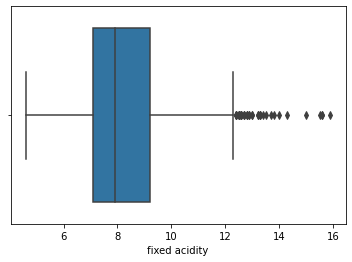

volatile acidity


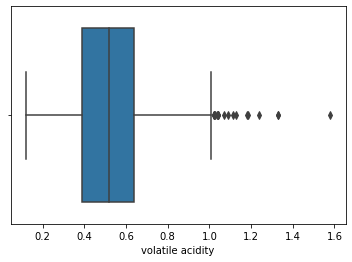

citric acid


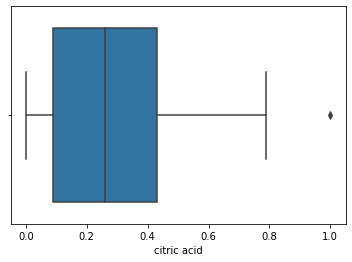

residual sugar


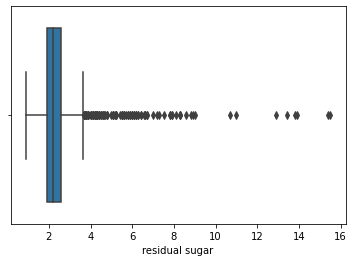

chlorides


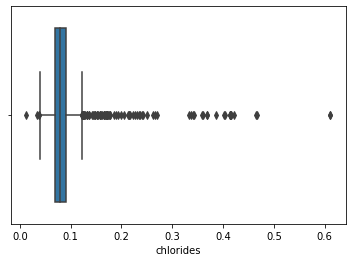

free sulfur dioxide


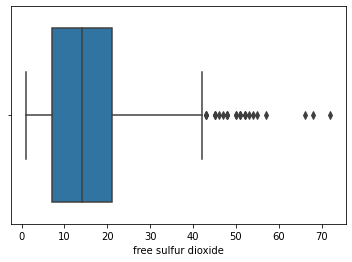

total sulfur dioxide


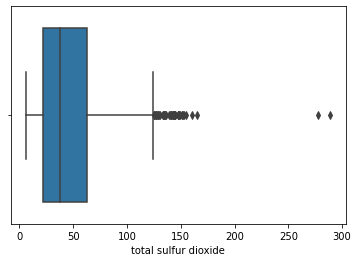

density


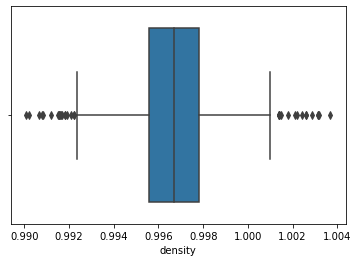

pH


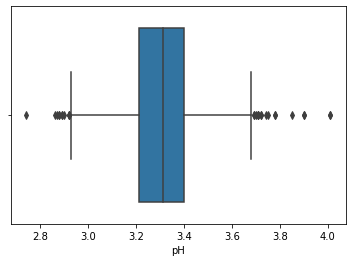

sulphates


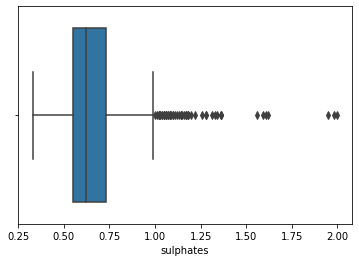

alcohol


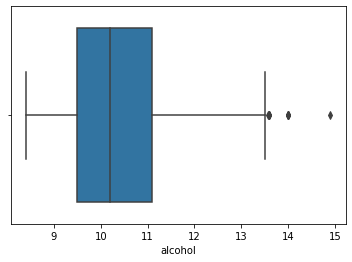

In [37]:
columns = df_vinho_tinto.columns[:-1]

for c in columns:
    print(c)
    sns.boxplot(x=c ,data=df_vinho_tinto)
    plt.show()

fixed acidity


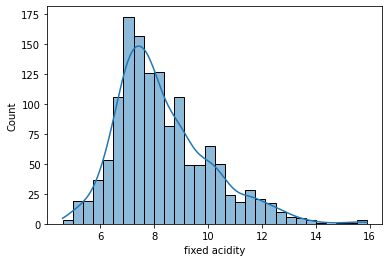

volatile acidity


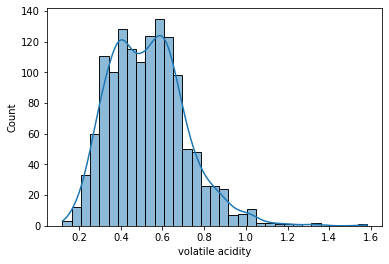

citric acid


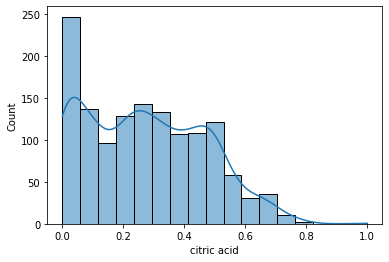

residual sugar


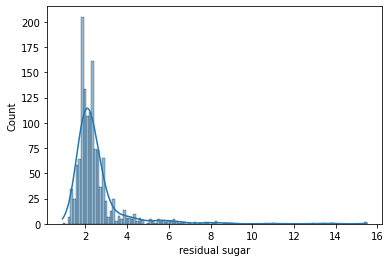

chlorides


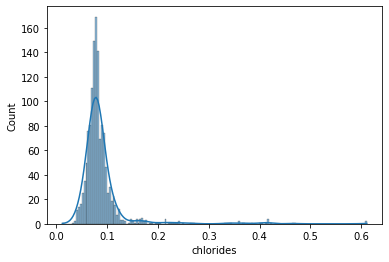

free sulfur dioxide


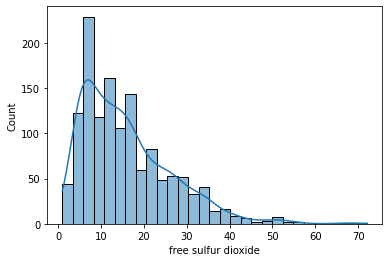

total sulfur dioxide


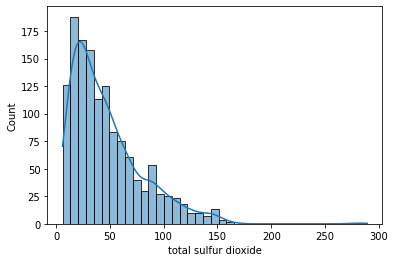

density


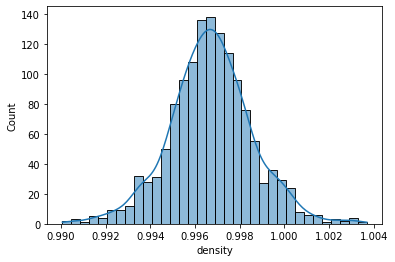

pH


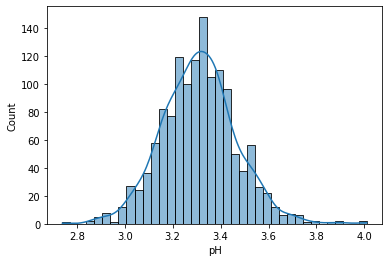

sulphates


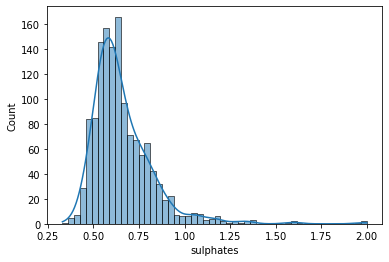

alcohol


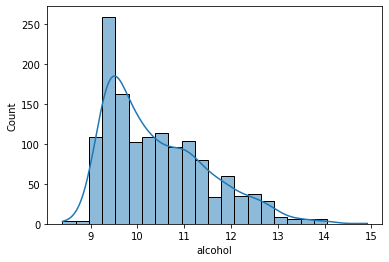

In [36]:
columns =  df_vinho_tinto.columns[:-1]

for c in columns:
    print(c)
    sns.histplot(x=c,data= df_vinho_tinto,kde=True)
    plt.show()

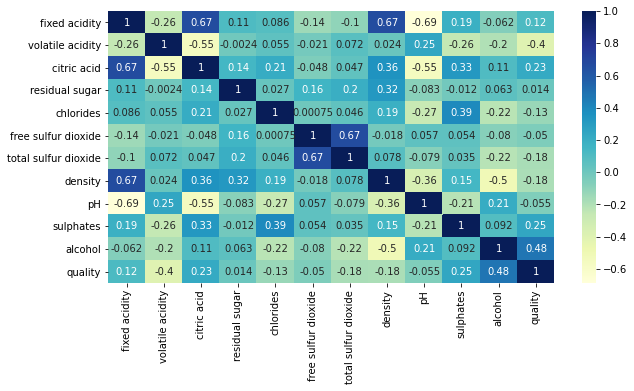

In [35]:
df_corr_vt = df_vinho_tinto.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_corr_vt, cmap="YlGnBu", annot=True, )
plt.show()

## Parte 2

fixed acidity


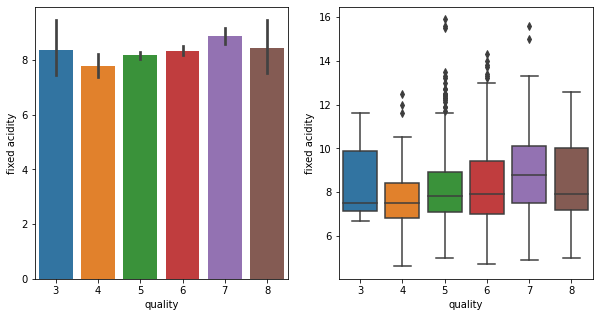

volatile acidity


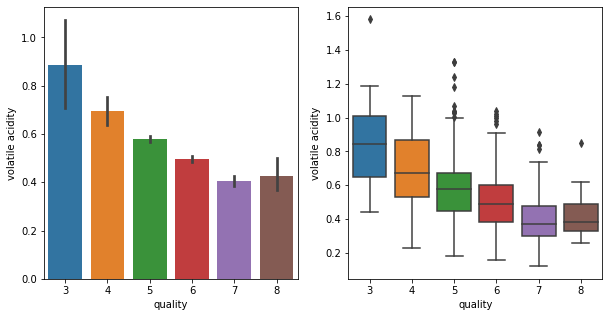

citric acid


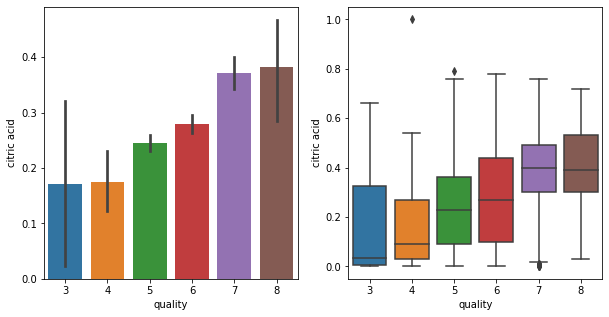

residual sugar


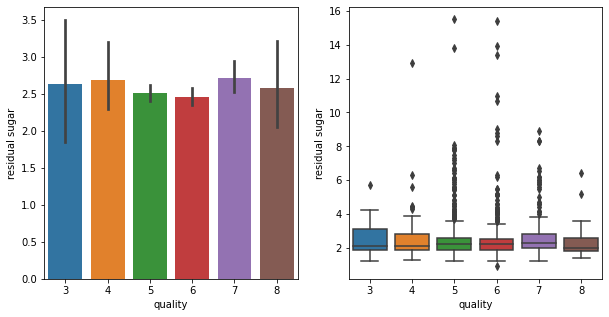

chlorides


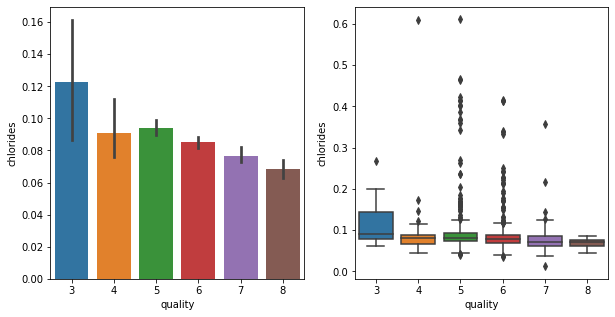

free sulfur dioxide


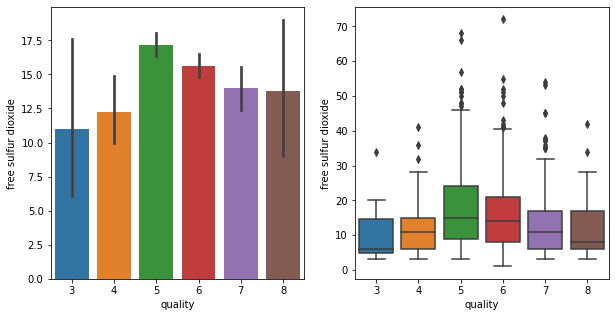

total sulfur dioxide


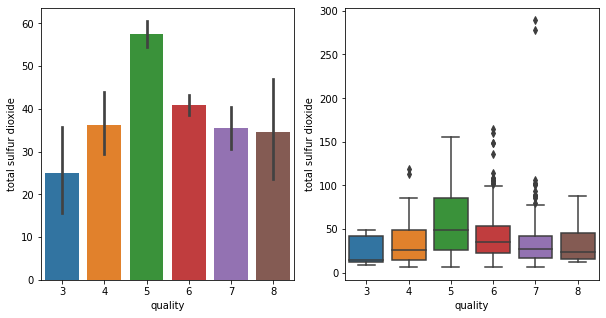

density


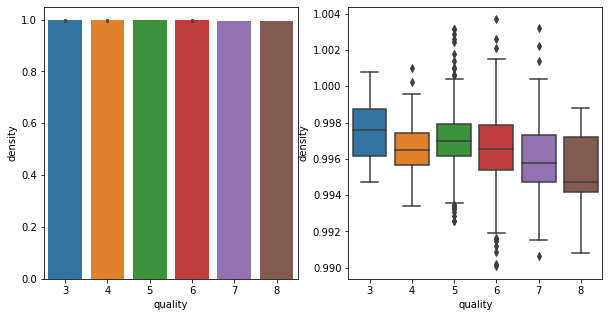

pH


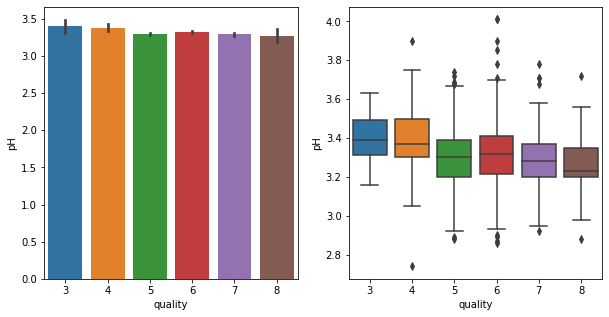

sulphates


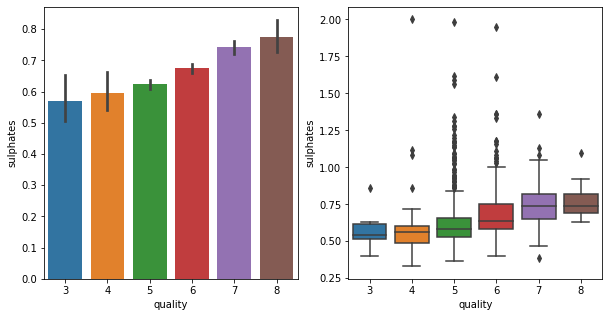

alcohol


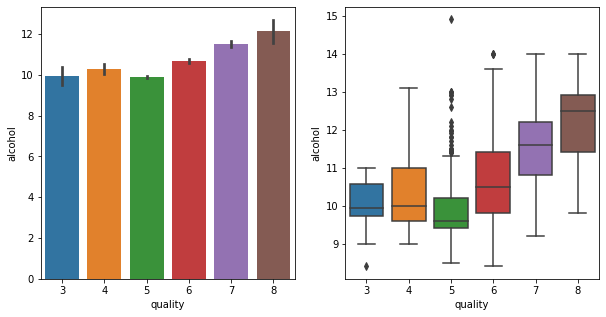

In [62]:
columns = df_vinho_tinto.columns[:-1]
q = 'quality'
for c in columns:
    print(c)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.barplot(ax=ax[0], y=c, x=q, data=df_vinho_tinto)
    sns.boxplot(ax=ax[1], y=c, x=q, data=df_vinho_tinto)
    plt.show()

## 1ª regressão

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# splitando os dados em treino e teste
X = df_vinho_tinto.drop(["quality"], axis=1)
y = df_vinho_tinto['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 7)

# normalizando os dados
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# fazendo a regressão
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [104]:
# Metricas
print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred, squared = False)) #rmse
print(metrics.mean_squared_error(y_test, y_pred)) #mse

0.346885813720087
0.6161145254758225
0.3795971085022979


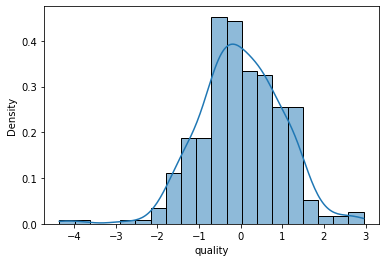

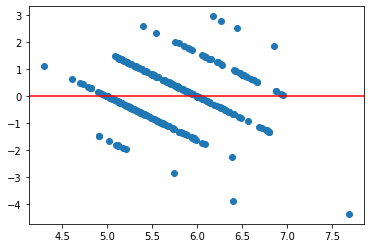

In [105]:
# análise de resido
residuals = y_test-y_pred
std_residuals = (residuals - residuals.mean())/residuals.std()

sns.histplot(std_residuals, kde = True, stat = "density")
plt.show()

# fig,ax = plt.subplots()
# probplot(std_residuals, plot = ax, fit=True)
# plt.show()

plt.scatter(y_pred, std_residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

## 2ª regressão

In [106]:
# splitando os dados em treino e teste
X = df_vinho_tinto[["fixed acidity", 'chlorides', 'total sulfur dioxide', 'alcohol']]
y = df_vinho_tinto['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 7)

# normalizando os dados
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# fazendo a regressão
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [107]:
# Metricas
print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred, squared = False)) #rmse
print(metrics.mean_squared_error(y_test, y_pred)) #mse

0.2414211993082519
0.6639987168042395
0.4408942959176766


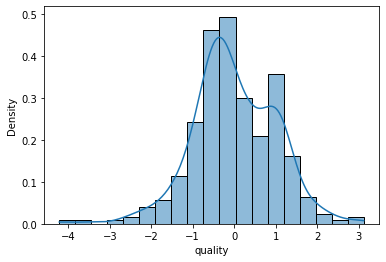

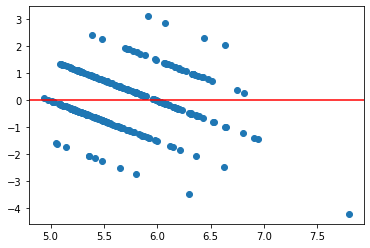

In [108]:
# análise de resido
residuals = y_test-y_pred
std_residuals = (residuals - residuals.mean())/residuals.std()

sns.histplot(std_residuals, kde = True, stat = "density")
plt.show()

# fig,ax = plt.subplots()
# probplot(std_residuals, plot = ax, fit=True)
# plt.show()

plt.scatter(y_pred, std_residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()